In [30]:
import numpy as np
import tifffile
from scipy.ndimage import label

In [45]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [66]:
tiff_data = tifffile.imread("/Users/ishaanshivhare/Desktop/HSAM/SmallEarthNet_labelled/Reference_Maps/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_reference_map.tif")

In [67]:
np_mask = np.array(tiff_data)
np_mask.shape

(120, 120)

In [ ]:
# np_data

array([[211, 211, 211, ..., 313, 313, 313],
       [211, 211, 211, ..., 313, 313, 313],
       [211, 211, 211, ..., 313, 313, 313],
       ...,
       [211, 211, 211, ..., 311, 311, 311],
       [211, 211, 211, ..., 311, 311, 311],
       [211, 211, 211, ..., 311, 311, 311]], dtype=uint16)

In [ ]:
# unique_values = np.unique(np_data)
# print(unique_values)

[211 231 311 313]


In [ ]:
# class_mask = np.where(np_data == 231, 1, 0)
# class_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# labeled_4, num_features_4 = label(class_mask)
# num_features_4

2

In [ ]:
# structure_8 = np.ones((3, 3))  # 8-connectivity kernel
# labeled_8, num_features_8 = label(class_mask, structure=structure_8)
# num_features_8

2

In [ ]:
# np.unique(labeled_8)

array([0, 1, 2], dtype=int32)

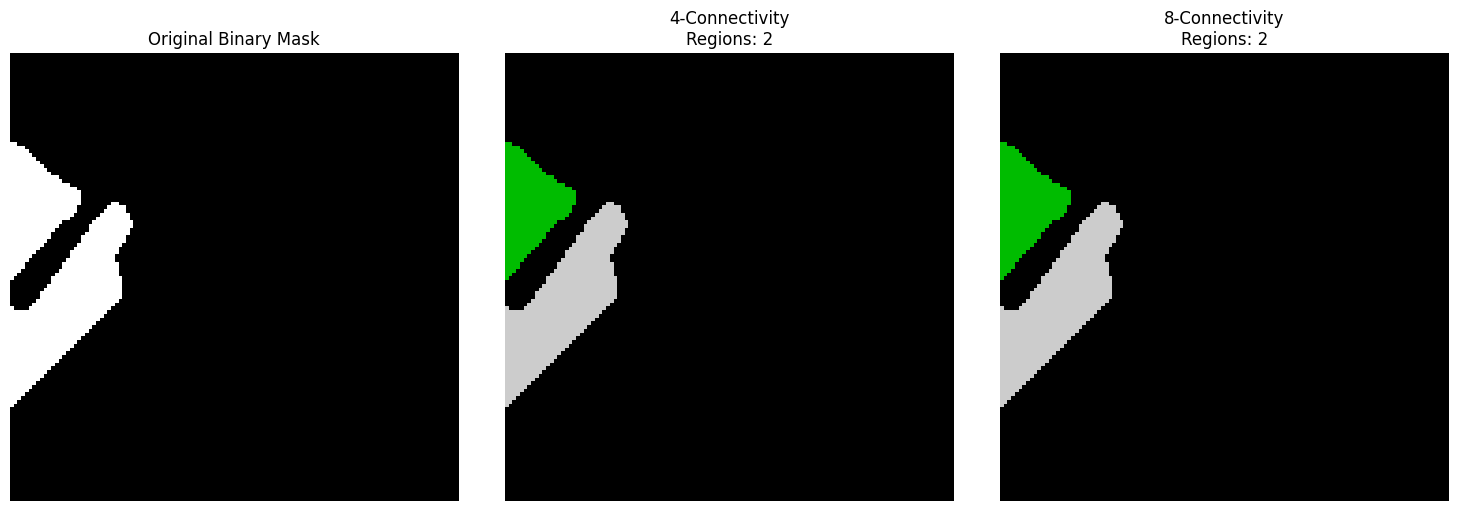

In [ ]:
# # Plot results
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# axs[0].imshow(class_mask, cmap='gray')
# axs[0].set_title("Original Binary Mask")
# axs[0].axis('off')

# axs[1].imshow(labeled_4, cmap='nipy_spectral')
# axs[1].set_title(f"4-Connectivity\nRegions: {num_features_4}")
# axs[1].axis('off')

# axs[2].imshow(labeled_8, cmap='nipy_spectral')
# axs[2].set_title(f"8-Connectivity\nRegions: {num_features_8}")
# axs[2].axis('off')

# plt.tight_layout()
# plt.show()

In [ ]:
# structure_8 = np.ones((3, 3))  # 8-connectivity kernel
# class_dict = {}
# for each_value in unique_values:
#     class_mask = np.where(np_data == each_value, 1, 0)
#     labeled, num_features = label(class_mask, structure=structure_8)
#     obj_arr = []
#     for i in range(1, num_features+1):
#         each_obj_mask = np.where(labeled == i, 1, 0)
#         obj_arr.append(each_obj_mask)
#     class_dict[each_value] = obj_arr

In [60]:
def get_centroid(obj_mask):
    indices = np.argwhere(obj_mask == 1)
    centroid = np.mean(indices, axis=0)
    return tuple(centroid.astype(int))  # Convert to integer coordinates

In [61]:
def get_random_point(obj_mask):
    indices = np.argwhere(obj_mask == 1)
    random_index = np.random.choice(len(indices))
    return tuple(indices[random_index])  # Return a random pixel's coordinates

In [ ]:
# TODO: Account for 999 class (unlabelled)
def process_ref_maps(tiff_map):
    
    # Convert tiff map to np array
    np_map = np.array(tiff_map)

    # Get list of classes present in this map
    unique_values = np.unique(np_map)
    structure_8 = np.ones((3, 3))  # 8-connectivity kernel
    
    class_dict = {}
    prompts = {}
    for each_value in unique_values:
        # class_mask = np.where(np_map == each_value, 1, 0)
        class_mask = (np_map == each_value).astype(int)
        labeled, num_features = label(class_mask, structure=structure_8)
        obj_arr = []
        obj_prompts = []
        for i in range(1, num_features+1):
            # each_obj_mask = np.where(labeled == i, 1, 0)
            each_obj_mask = (labeled == i).astype(int)
            obj_arr.append(each_obj_mask)
            centroid = get_centroid(each_obj_mask)
            random_point = get_random_point(each_obj_mask)        
            obj_prompts.append({"centroid": centroid, "random_point": random_point})
    
        class_dict[each_value] = obj_arr
        prompts[each_value] = obj_prompts
    
    return class_dict, prompts


In [55]:
eg_dict = process_ref_maps(tiff_data)

In [56]:
for each_class in eg_dict.keys():
    print(each_class)
    print(len(eg_dict[each_class]))

211
1
231
2
311
1
313
1


In [85]:
tiff_img = tifffile.imread('/Users/ishaanshivhare/Desktop/HSAM/SmallEarthNet_labelled/SmallEarthNet-S2/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55_B8A.tif')

In [86]:
np_b01 = np.array(tiff_img)

In [87]:
np_b01.shape

(60, 60)

In [ ]:
# NOTE: BANDS 1 & 9 are smaller resolution: which we will ignore.
